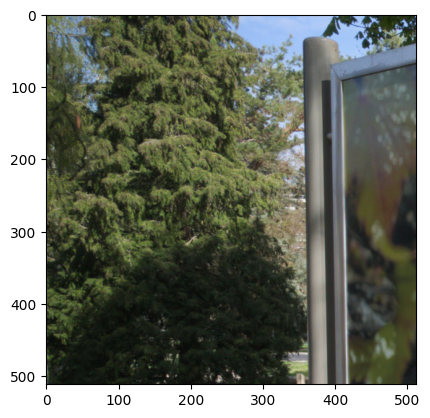

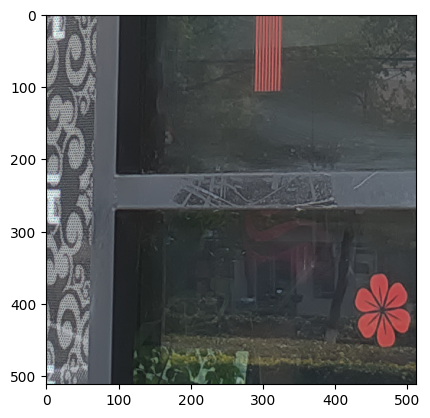

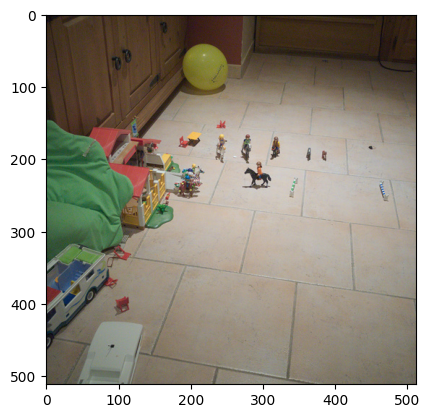

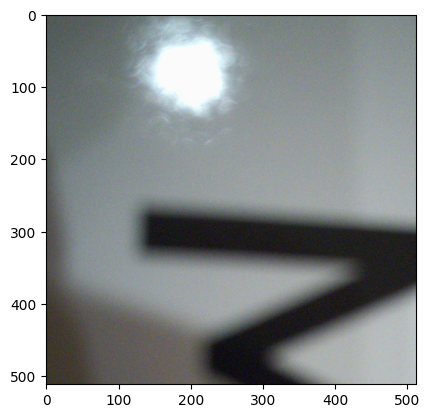

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

files = os.listdir('test_images')

for file in files:
    if file.endswith('.jpg'):
        img = mpimg.imread('test_images/' + file)
        imgplot = plt.imshow(img)
        plt.show()

In [30]:
import glob
from os import path, remove
import random
import string

from main import embed,extract


def run_embed():
    files = glob.glob("test_images/*.jpg")
    for file in files:
        # generate a random text to embed
        text = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(100))
        filename = path.splitext(path.basename(file))[0]
        output_file = f"test_images/output/{filename}_stego.jpg"
        if path.exists(output_file):
            remove(output_file)
        print(f"Embedding the Message in {file} and saving it as {output_file}")
        embed(file, output_file, text , "password", 42)
        print("Encoded Message: " + text)
        

def run_extract():
    #find all the stego images in the output folder
    files = glob.glob("test_images/output/*_stego.png")
    for file in files:
        filename = path.splitext(path.basename(file))[0]
        print(f"Extracting the Message from {file}")
        print("Encoded message in cover image {} is -> {} " .format(filename, extract(file, "password", 42)))



In [31]:
run_embed()
run_extract()

Embedding the Message in test_images/1.jpg and saving it as test_images/output/1_stego.jpg
Encoded Message: 4W9RSH8YZWJSCSFW2Q4NM8R9RIGPPD7OODG0V4GIA9K044MSUSDFO8CL0LCZ5LSCATGVS3875I63RMHVK3QLAVSMLZ16UFZGLI4U
Embedding the Message in test_images/00001.jpg and saving it as test_images/output/00001_stego.jpg
Encoded Message: ZEJBF7NY03VKXTUFDJKDFR21520RN6HW1HS57TCOZDANTNIQSUHA51LIY8O69WEZC1B3EU1Z0SHZBUK3XF1GP1Z7FZTVOVKE6H76
Embedding the Message in test_images/2.jpg and saving it as test_images/output/2_stego.jpg
Encoded Message: WTZIFT9YVI7F16XBXTLNV5MOIJESG687CVIYJKLK2C0XP2S2O8PT4MX23SY670KMIQD4X9G7HSFKR26J1FO2WB0DZ6XPYFXOBUGV
Embedding the Message in test_images/00005.jpg and saving it as test_images/output/00005_stego.jpg
Encoded Message: 4W9RSH8YZWJSCSFW2Q4NM8R9RIGPPD7OODG0V4GIA9K044MSUSDFO8CL0LCZ5LSCATGVS3875I63RMHVK3QLAVSMLZ16UFZGLI4U
Embedding the Message in test_images/00002.jpg and saving it as test_images/output/00002_stego.jpg
Encoded Message: WTZIFT9YVI7F16XBXTLNV5MOIJESG687

In [38]:
import numpy as np
import scipy.spatial.distance as dist
from PIL import Image

def check_difference(cover_image_list,encode_image_list):
    
    plt.figure(1,figsize=(10,10))
    l = []
    for img,encoded_img in zip(cover_image_list,encode_image_list):
        im1 = Image.open(img)
        im2 = Image.open(encoded_img)
        im1_array=np.array(im1).reshape(-1)
        im2_array=np.array(im2).reshape(-1)
        sim = 1 - np.abs(dist.cosine(im1_array, im2_array))
        l.append(sim)
        print("Cosine similarity between {} cover image and encoded image is {}".format(img,sim))     
    #average similarity
    print("Average similarity is {}".format(sum(l)/len(l)))  

print("Difference With Our Method")
check_difference(
    [
        "test_images/00001.jpg",
        "test_images/00002.jpg",
        "test_images/00004.jpg",
        "test_images/00005.jpg",
    ],
    [
        "test_images/output/00001_stego.png",
        "test_images/output/00002_stego.png",
        "test_images/output/00004_stego.png",
        "test_images/output/00005_stego.png",
    ]
)

print("Difference with UERD Method")
check_difference(
    [
        "test_images/00001.jpg",
        "test_images/00002.jpg",
        "test_images/00004.jpg",
        "test_images/00005.jpg",
    ],
    [
        "test_images/UERD/00001.jpg",
        "test_images/UERD/00002.jpg",
        "test_images/UERD/00004.jpg",
        "test_images/UERD/00005.jpg",
    ]
)

print("Difference with JUNIWARD Method")
check_difference(
    [
        "test_images/00001.jpg",
        "test_images/00002.jpg",
        "test_images/00004.jpg",
        "test_images/00005.jpg",
    ],
    [
        "test_images/JUNIWARD/00001.jpg",
        "test_images/JUNIWARD/00002.jpg",
        "test_images/JUNIWARD/00004.jpg",
        "test_images/JUNIWARD/00005.jpg",
    ]
)

print("Difference with JMiPOD Method")
check_difference(
    [
        "test_images/00001.jpg",
        "test_images/00002.jpg",
        "test_images/00004.jpg",
        "test_images/00005.jpg",
    ],
    [
        "test_images/JMiPOD/00001.jpg",
        "test_images/JMiPOD/00002.jpg",
        "test_images/JMiPOD/00004.jpg",
        "test_images/JMiPOD/00005.jpg",
    ]
)

Difference With Our Method
Cosine similarity between test_images/00001.jpg cover image and encoded image is 0.9696021016866714
Cosine similarity between test_images/00002.jpg cover image and encoded image is 0.9554749353866467
Cosine similarity between test_images/00004.jpg cover image and encoded image is 0.9610457256142413
Cosine similarity between test_images/00005.jpg cover image and encoded image is 0.9747208872946544
Average similarity is 0.9652109124955535
Difference with UERD Method
Cosine similarity between test_images/00001.jpg cover image and encoded image is 0.9448083512781327
Cosine similarity between test_images/00002.jpg cover image and encoded image is 0.9082146657363286
Cosine similarity between test_images/00004.jpg cover image and encoded image is 0.8849972199365943
Cosine similarity between test_images/00005.jpg cover image and encoded image is 0.9963380693441106
Average similarity is 0.9335895765737916
Difference with JUNIWARD Method
Cosine similarity between test_

<Figure size 1000x1000 with 0 Axes>

In [2]:
from cmath import log10
import cv2
import numpy


def compute_mean_square_error(cover_image_path: str, stego_image_path: str) -> float:
    cover_image = cv2.imread(cover_image_path, cv2.IMREAD_GRAYSCALE)
    stego_image = cv2.imread(stego_image_path, cv2.IMREAD_GRAYSCALE)
    diff = numpy.sum(
        (cover_image.astype("float") - stego_image.astype("float")) ** 2)
    err = numpy.divide(diff, float(cover_image.shape[0] * cover_image.shape[1]))
    return err

def compute_peak_signal_to_noise_ratio(mean_square_error: float) -> float:
    return 10 * log10((255 ** 2) / mean_square_error)

In [4]:
mse = compute_mean_square_error(
    "./test_images/00004.jpg",
    "./test_images/output/00004_stego.jpg"
)

psnr = compute_peak_signal_to_noise_ratio(mse)

print(f"MSE: {mse}")
print(f"PSNR: {psnr}")

print("JMiPOD")
mse = compute_mean_square_error(
    "./test_images/00004.jpg",
    "./test_images/JMiPOD/00004.jpg"
)

psnr = compute_peak_signal_to_noise_ratio(mse)

print(f"MSE: {mse}")
print(f"PSNR: {psnr}")

print("JUNIWARD")
mse = compute_mean_square_error(
    "./test_images/00004.jpg",
    "./test_images/JUNIWARD/00004.jpg"
)

psnr = compute_peak_signal_to_noise_ratio(mse)

print(f"MSE: {mse}")
print(f"PSNR: {psnr}")

print("UERD")
mse = compute_mean_square_error(
    "./test_images/00004.jpg",
    "./test_images/UERD/00004.jpg"
)

psnr = compute_peak_signal_to_noise_ratio(mse)

print(f"MSE: {mse}")
print(f"PSNR: {psnr}")


0.0386505126953125
(62.25925101701061+0j)
JMiPOD
MSE: 0.3160133361816406
PSNR: (53.133749500600025+0j)
JUNIWARD
MSE: 0.2774658203125
PSNR: (53.698708687746944+0j)
UERD
MSE: 0.6424980163574219
PSNR: (50.05208569699373+0j)


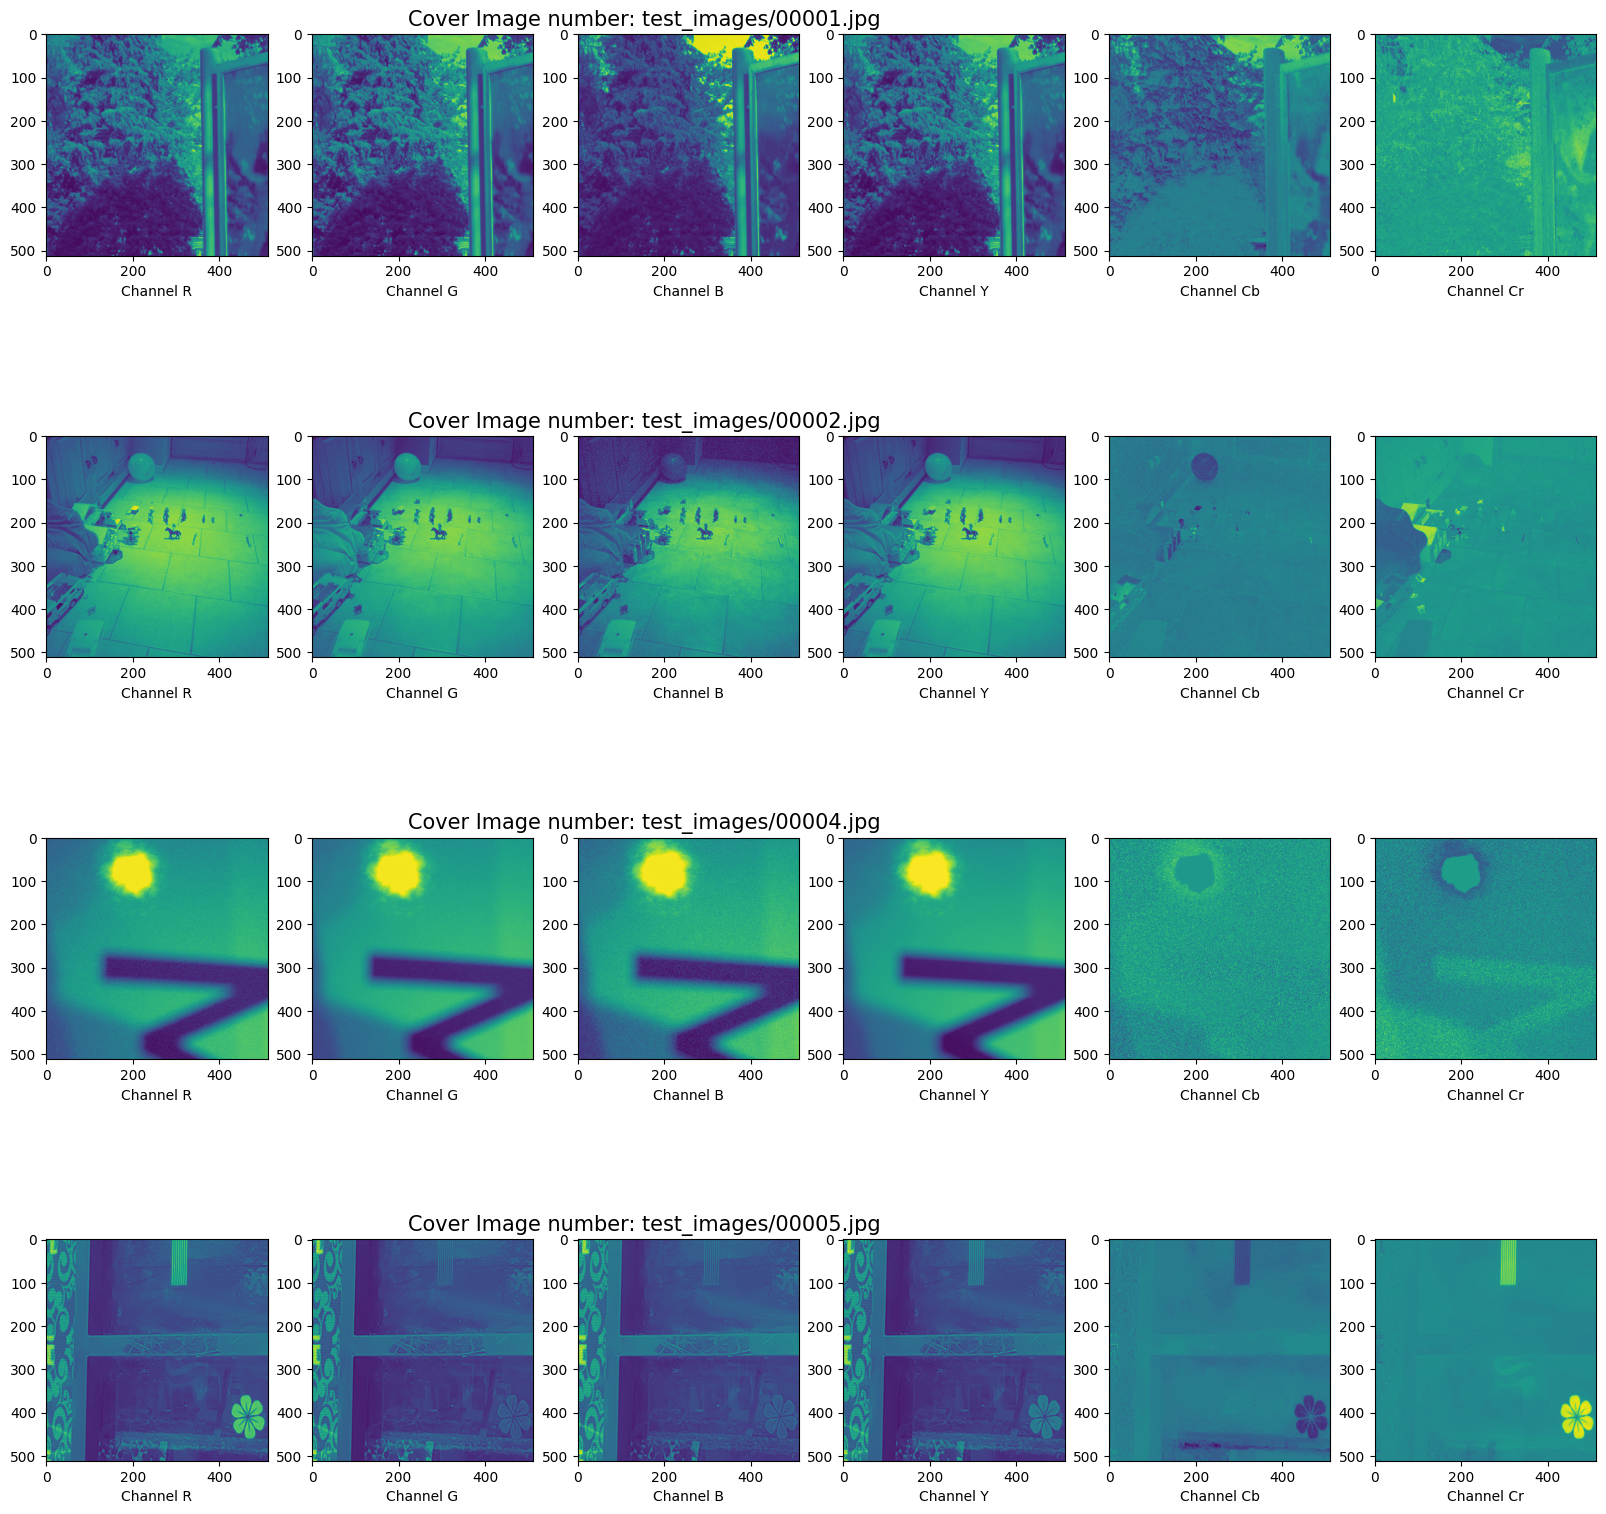

In [33]:
cover_image_list = [
    "test_images/00001.jpg",
    "test_images/00002.jpg",
    "test_images/00004.jpg",
    "test_images/00005.jpg",
]


def YCbCr_channel(cover_image_list, title):
    fig, axes = plt.subplots(
        ncols=6, nrows=cover_image_list.__len__(), figsize=(20, 20)
    )
    for i, img in enumerate(cover_image_list):
        im1 = Image.open(img)
        im1_ycbcr = im1.convert("YCbCr")
        y1, cb1, cr1 = im1_ycbcr.split()
        r, g, b = im1.split()
        axes[i][0].imshow(r)
        axes[i][0].set_xlabel("Channel R")
        axes[i][1].imshow(g)
        axes[i][1].set_xlabel("Channel G")
        axes[i][2].imshow(b)
        axes[i][2].set_xlabel("Channel B")
        axes[i][3].imshow(y1)
        axes[i][3].set_xlabel("Channel Y")
        axes[i][4].imshow(cb1)
        axes[i][4].set_xlabel("Channel Cb")
        axes[i][5].imshow(cr1)
        axes[i][5].set_xlabel("Channel Cr")

    for ax, row in zip(axes[:, 0], cover_image_list):
        ax.set_title(title.format(row), size=15, x=2.7, y=1.0)


YCbCr_channel(cover_image_list, title="Cover Image number: {}")


In [7]:

BASE_PATH = "test_images"
cover_image = mpimg.imread(os.path.join(BASE_PATH, "00004.jpg"))
JMiPOD_image = mpimg.imread(os.path.join(BASE_PATH, "JMiPOD/00004.jpg"))
JUNIWARD_image = mpimg.imread(os.path.join(BASE_PATH, "JUNIWARD/00004.jpg"))
UERD_image = mpimg.imread(os.path.join(BASE_PATH, "UERD/00004.jpg"))
OUR_image = mpimg.imread(os.path.join(BASE_PATH, "output/00004_stego.jpg"))

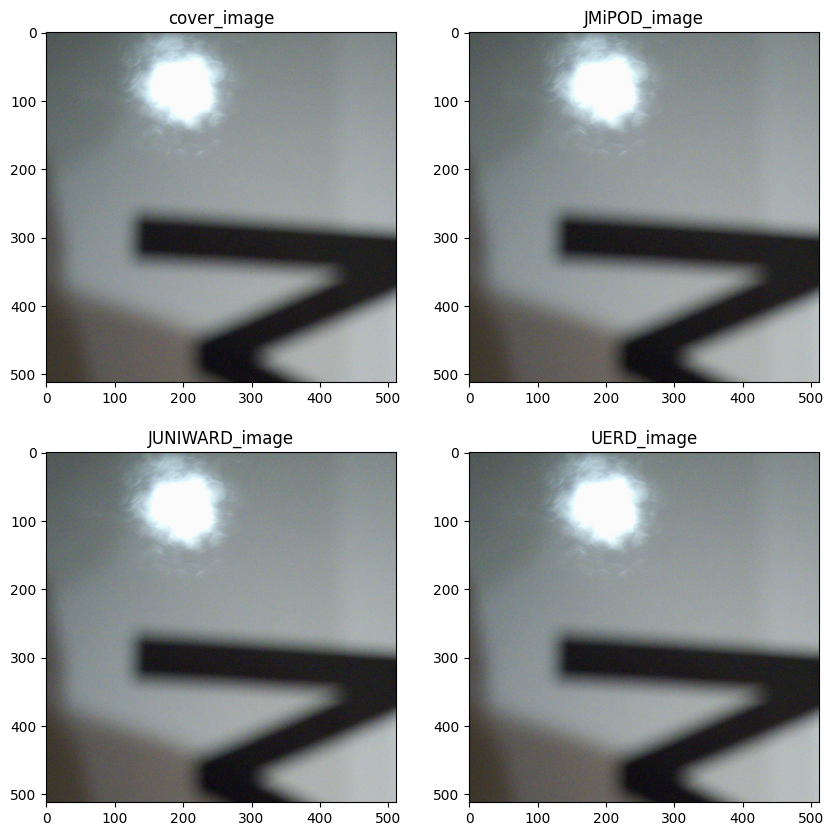

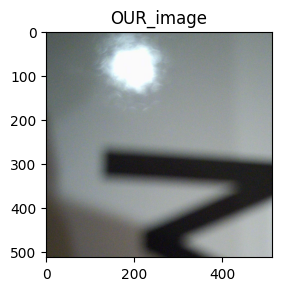

In [8]:
plt.figure(1, figsize = (10, 10))
plt.subplot(221)
plt.title("cover_image")
plt.imshow(cover_image)

plt.subplot(222)
plt.imshow(JMiPOD_image)
plt.title("JMiPOD_image")

plt.subplot(223)
plt.imshow(JUNIWARD_image)
plt.title("JUNIWARD_image")

plt.subplot(224)
plt.imshow(UERD_image)
plt.title("UERD_image")
plt.show()

plt.subplot(122)
plt.imshow(OUR_image)
plt.title("OUR_image")
plt.show()

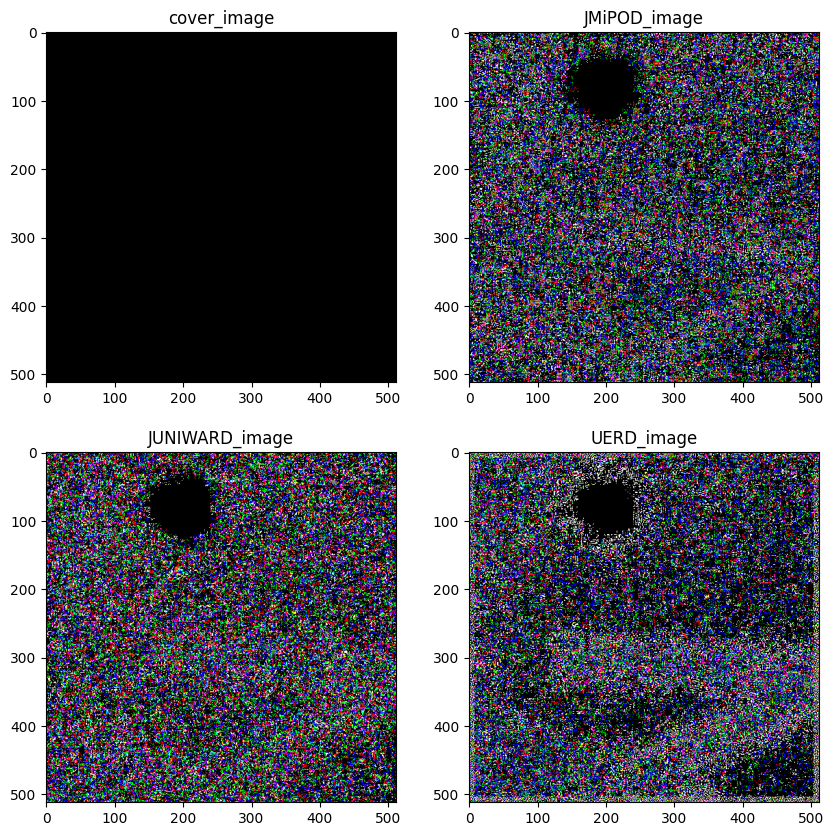

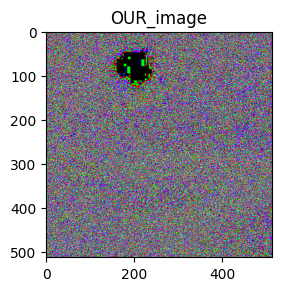

In [9]:
plt.figure(1, figsize = (10, 10))
plt.subplot(221)
plt.title("cover_image")
plt.imshow(cover_image - cover_image)

plt.subplot(222)
plt.imshow(JMiPOD_image - cover_image)
plt.title("JMiPOD_image")

plt.subplot(223)
plt.imshow(JUNIWARD_image - cover_image)
plt.title("JUNIWARD_image")

plt.subplot(224)
plt.imshow(UERD_image - cover_image)
plt.title("UERD_image")
plt.show()

plt.subplot(122)
plt.imshow(OUR_image - cover_image)
plt.title("OUR_image")
plt.show()

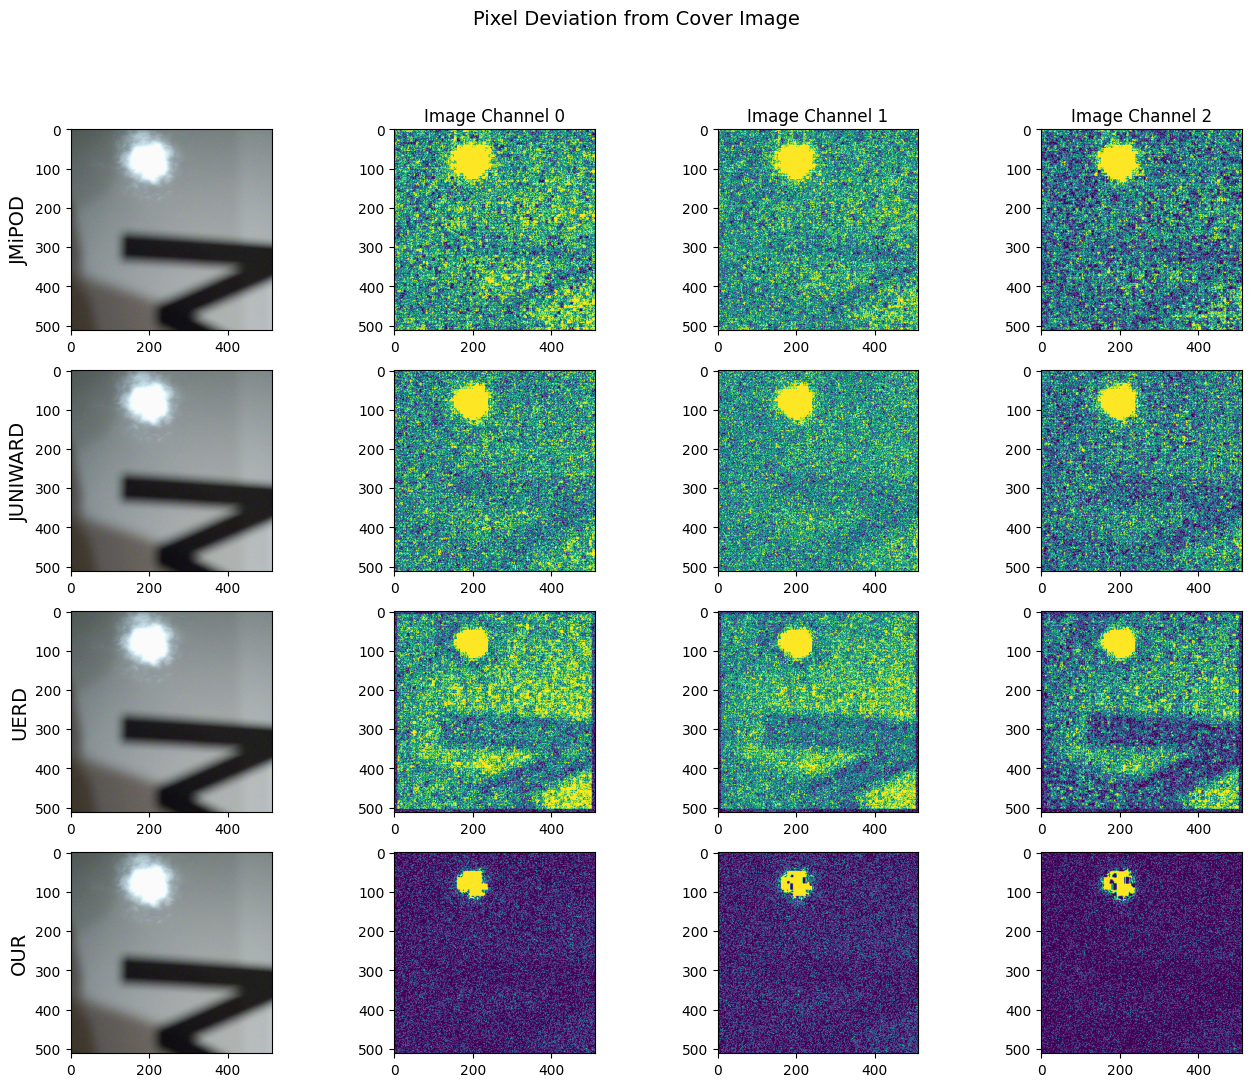

In [17]:
import skimage.io as sk


img_cover = sk.imread(
    os.path.join(BASE_PATH, "00004.jpg")
)
img_jmipod = sk.imread(
    os.path.join(BASE_PATH, "JMiPOD/00004.jpg")
)
img_juniward = sk.imread(
    os.path.join(BASE_PATH, "JUNIWARD/00004.jpg")
)
img_uerd = sk.imread(
    os.path.join(BASE_PATH, "UERD/00004.jpg")
)
img_our = sk.imread(
    os.path.join(BASE_PATH, "output/00004_stego.jpg")
)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
ax[0,0].imshow(img_jmipod)
ax[0,1].imshow((img_cover == img_jmipod).astype(int)[:,:,0])
ax[0,1].set_title(f'Image Channel 0')

ax[0,2].imshow((img_cover == img_jmipod).astype(int)[:,:,1])
ax[0,2].set_title(f'Image Channel 1')
ax[0,3].imshow((img_cover == img_jmipod).astype(int)[:,:,2])
ax[0,3].set_title(f'Image Channel 2')
ax[0,0].set_ylabel('JMiPOD', rotation=90, fontsize=14)

ax[1,0].imshow(img_juniward)
ax[1,1].imshow((img_cover == img_juniward).astype(int)[:,:,0])
ax[1,2].imshow((img_cover == img_juniward).astype(int)[:,:,1])
ax[1,3].imshow((img_cover == img_juniward).astype(int)[:,:,2])
ax[1,0].set_ylabel('JUNIWARD', rotation=90,fontsize=14)
ax[2,0].imshow(img_uerd)
ax[2,1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2,2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[2,3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[2,0].set_ylabel('UERD', rotation=90, fontsize=14)

ax[3,0].imshow(img_our)
ax[3,1].imshow((img_cover == img_our).astype(int)[:,:,0])
ax[3,2].imshow((img_cover == img_our).astype(int)[:,:,1])
ax[3,3].imshow((img_cover == img_our).astype(int)[:,:,2])
ax[3,0].set_ylabel('OUR', rotation=90, fontsize=14)

plt.suptitle('Pixel Deviation from Cover Image', fontsize=14)

plt.show()

